In [14]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#Cargar datos desde Drive
#===============================================================================
#from google.colab import drive

#Eliminacion de valores nulos via reemplazo por mean, median o moda
#===============================================================================
from sklearn.impute import SimpleImputer
from sklearn import impute

#Calculo Matriz de Correlaciones
#===============================================================================
import seaborn as sns

#Para el entrenamiento de los modelos
#===============================================================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.inspection import permutation_importance
import multiprocessing

#Metricas para evaluar predicciones
#===============================================================================
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

#Matriz de Confusion
#===============================================================================
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.datasets import load_breast_cancer

#Hagamos EDA de la "forma fácil" ahora que tenemos preprocesados los datos
#===============================================================================
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#from pandas_profiling import ProfileReport

In [15]:
datos = pd.read_csv('FUAS-Clustering.csv', sep=";")
datos.head()

,MRUN,Anio_Nacimiento_final,Anio_Egreso_EM_final,Anio_Inicio_Gratuidad_final,Anios_con_Gratuidad_final,Anios_Duracion_Carrera_Origen_final,Anios_Estudiando_Carrera_Origen_final,Anios_Estudiando_ES_final,Cantidad_asignaciones_final,Cantidad_Postulaciones_final,Dependencia_Establecimiento_cod,Gana_Gratuidad_final,Institucion_cod,Mensualidad_Establecimiento_final,Nota_Egreso_EM_final2,Quintil_Final,Regio_Establecimiento_final,Sexo_cod,Tipo_Carrera_Origen_cod
0,35,1997,2015,2017,4,5,4,4,4,2,2,1,4,GRATUITO,62,2,MAULE,1,2
1,309,1995,2013,2017,2,3,3,3,2,1,1,1,1,GRATUITO,55,2,RM,1,1
2,386,2000,2017,2018,3,4,3,3,3,1,3,1,2,GRATUITO,58,2,RIOS,1,2
3,452,1990,2015,2017,3,2,1,5,3,3,5,1,2,GRATUITO,49,2,RM,2,2
4,598,1995,2013,2017,2,3,1,3,3,2,3,1,2,$10.001 A $25.000,53,2,RM,2,2


In [16]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003417 entries, 0 to 2003416
Data columns (total 19 columns):
 #   Column                                 Dtype 
---  ------                                 ----- 
 0   MRUN                                   int64 
 1   Anio_Nacimiento_final                  int64 
 2   Anio_Egreso_EM_final                   int64 
 3   Anio_Inicio_Gratuidad_final            int64 
 4   Anios_con_Gratuidad_final              int64 
 5   Anios_Duracion_Carrera_Origen_final    int64 
 6   Anios_Estudiando_Carrera_Origen_final  int64 
 7   Anios_Estudiando_ES_final              int64 
 8   Cantidad_asignaciones_final            int64 
 9   Cantidad_Postulaciones_final           int64 
 10  Dependencia_Establecimiento_cod        int64 
 11  Gana_Gratuidad_final                   int64 
 12  Institucion_cod                        int64 
 13  Mensualidad_Establecimiento_final      object
 14  Nota_Egreso_EM_final2                  int64 
 15  Quintil_Final  

In [17]:
# Reemplazo variables categoricas, utilizaremos LabelEncoder
#========================================================================
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, Normalizer
Columnas_Categoricas=['Mensualidad_Establecimiento_final', 'Regio_Establecimiento_final']
df_prep=datos
LabelsEnc = LabelEncoder()
for i in Columnas_Categoricas:
  df_prep[i] = LabelsEnc.fit_transform(datos[i])
datos=df_prep

In [18]:
##############    Seleccion de registros pertenecientes al año 2017  #######################################
### iloc ####loc
#df.iloc[0:5] # Primeras cinco filas
#df.iloc[:, 0:5] # Primeras cinco columnas
#df.iloc[[0,2,1]]  # Primera, tercera y segunda filas
#df.iloc[:, [0,2,1]]  # Primera, tercera y segunda columnas
#
#is_male = df.loc[:, 'sex'] == 'Male'
#df_male = df.loc[is_male]
filas2017=df_prep.loc[:,'Anio_Inicio_Gratuidad_final']==2017
df2017=datos.loc[filas2017]
df2017=df2017[['Anios_con_Gratuidad_final','Anio_Nacimiento_final','Anio_Egreso_EM_final','Anios_Duracion_Carrera_Origen_final','Anios_Estudiando_Carrera_Origen_final','Anios_Estudiando_ES_final','Cantidad_asignaciones_final','Cantidad_Postulaciones_final','Dependencia_Establecimiento_cod','Institucion_cod','Mensualidad_Establecimiento_final','Nota_Egreso_EM_final2','Quintil_Final','Regio_Establecimiento_final','Sexo_cod','Tipo_Carrera_Origen_cod']]
df2017.tail()

,Anios_con_Gratuidad_final,Anio_Nacimiento_final,Anio_Egreso_EM_final,Anios_Duracion_Carrera_Origen_final,Anios_Estudiando_Carrera_Origen_final,Anios_Estudiando_ES_final,Cantidad_asignaciones_final,Cantidad_Postulaciones_final,Dependencia_Establecimiento_cod,Institucion_cod,Mensualidad_Establecimiento_final,Nota_Egreso_EM_final2,Quintil_Final,Regio_Establecimiento_final,Sexo_cod,Tipo_Carrera_Origen_cod
1191200,1,1999,2016,5,1,2,1,1,3,2,4,48,2,14,2,2
1191201,1,1996,2015,2,1,2,1,3,3,1,4,48,2,6,1,1
1191202,1,1996,2014,3,1,4,1,3,4,1,3,50,2,14,1,1
1191203,1,1989,2007,4,1,2,1,1,2,2,4,45,2,14,1,2
1191204,1,1998,2015,5,1,5,1,3,3,1,4,57,2,7,1,1


In [24]:
# Rendimiento de diferentes modelos
#===============================================================================
X = df2017[['Anio_Nacimiento_final','Anio_Egreso_EM_final','Anios_Duracion_Carrera_Origen_final','Anios_Estudiando_Carrera_Origen_final','Anios_Estudiando_ES_final','Cantidad_asignaciones_final','Dependencia_Establecimiento_cod','Institucion_cod','Nota_Egreso_EM_final2','Quintil_Final','Regio_Establecimiento_final','Sexo_cod','Tipo_Carrera_Origen_cod']]
y = df2017['Anios_con_Gratuidad_final']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8, #regla 80-20%
                                        random_state = 1234,
                                        shuffle      = True
                                    )
modelos = []
#modelos.append(("LogisticRegression",LogisticRegression()))
#modelos.append(("SVR/Vectores de soporte regresion",SVR()))
#modelos.append(("RandomForestClassifier",RandomForestClassifier()))
#modelos.append(("Regresion Polinomial",PolynomialFeatures()))
modelos.append(("DecisionTreeRegressor/Arboles de decision",DecisionTreeRegressor()))
modelos.append(("LinearRegression/Regresion Lineal",LinearRegression()))
modelos.append(("RandomForestRegressor/Bosques aleatorios de Regresion",RandomForestRegressor()))
modelos.append(("KNeighborsRegressor/Regresion sobre Vecinos Cercanos",KNeighborsRegressor()))

puntuacion = []
for nombre,modelo in modelos:
  modelo.fit(X_train,y_train)
  resultado = modelo.score(X_test,y_test)
  puntuacion.append((nombre,modelo.predict(X_test)))
  print("El rendimiento del modelo {model} es {ren:.3f}%".format(
      model=nombre,
      ren=resultado*100
))

El rendimiento del modelo DecisionTreeRegressor/Arboles de decision es 67.589%
El rendimiento del modelo LinearRegression/Regresion Lineal es 72.049%
El rendimiento del modelo RandomForestRegressor/Bosques aleatorios de Regresion es 82.009%
El rendimiento del modelo KNeighborsRegressor/Regresion sobre Vecinos Cercanos es 74.797%


In [13]:
#Grid Search basado en out-of-bag error
#Aunque el análisis individual de los hiperparámetros es útil para entender su impacto en el modelo e identificar 
#rangos de interés, la búsqueda final no debe hacerse de forma secuencial, ya que cada hiperparámetro interacciona
#con los demás. Es preferible recurrir a grid search o random search para analizar varias combinaciones de hiperparámetros.
#Puede encontrarse más información sobre las estrategias de búsqueda en Machine learning con Python y Scikit-learn.

# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [300],
                 'max_features': [3, 4, 5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20, 30]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

Modelo: {'max_depth': None, 'max_features': 3, 'n_estimators': 300} ✓
Modelo: {'max_depth': None, 'max_features': 4, 'n_estimators': 300} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 300} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 300} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 300} ✓
Modelo: {'max_depth': 3, 'max_features': 3, 'n_estimators': 300} ✓
Modelo: {'max_depth': 3, 'max_features': 4, 'n_estimators': 300} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 300} ✓
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 300} ✓
Modelo: {'max_depth': 3, 'max_features': 9, 'n_estimators': 300} ✓
Modelo: {'max_depth': 10, 'max_features': 3, 'n_estimators': 300} ✓
Modelo: {'max_depth': 10, 'max_features': 4, 'n_estimators': 300} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 300} ✓
Modelo: {'max_depth': 10, 'max_features': 7, 'n_estimators': 300} ✓
Modelo: {'max_depth': 10, 'max_features': 9

,oob_r2,max_depth,max_features,n_estimators
16,0.836710,20.0,4.0,300.0
15,0.836657,20.0,3.0,300.0
17,0.835723,20.0,5.0,300.0
18,0.834157,20.0,7.0,300.0


In [27]:
#Importancia por permutación
#======================================================================
importancia = permutation_importance(
                estimator    = modelo,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
5,0.344435,0.002128,Cantidad_asignaciones_final
1,0.182232,0.000526,Anio_Egreso_EM_final
4,0.121102,0.000867,Anios_Estudiando_ES_final
8,0.112789,0.000785,Nota_Egreso_EM_final2
0,0.111413,0.000717,Anio_Nacimiento_final
3,0.101688,0.000441,Anios_Estudiando_Carrera_Origen_final
10,0.086112,0.000673,Regio_Establecimiento_final
7,0.066341,0.000812,Institucion_cod
2,0.057267,0.000425,Anios_Duracion_Carrera_Origen_final
6,0.024907,0.000944,Dependencia_Establecimiento_cod


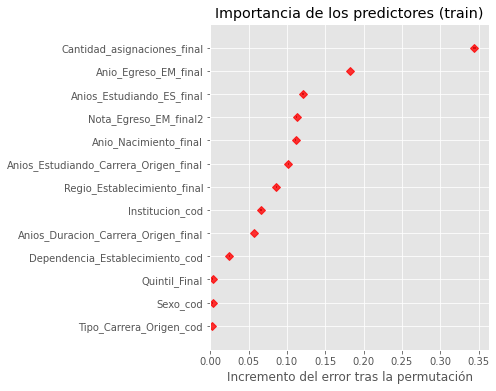

In [28]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

In [29]:
#Crear lmodelo con los hiperparametros encontrados, evaluar el score y error final
#Se seleccionaran solo 4 features
#146 arboles. Profunidad 20 y 4 Variables
#=================================================

X = df2017[['Cantidad_asignaciones_final','Anio_Egreso_EM_final','Anios_Estudiando_ES_final','Nota_Egreso_EM_final2']]
y = df2017['Anios_con_Gratuidad_final']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8, #regla 80-20%
                                        random_state = 1234,
                                        shuffle      = True
                                    )
#===============================================================================
modelo = RandomForestRegressor(
            n_estimators = 300,
            criterion    = 'mse',
            max_depth    = 20,
            max_features = 4,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, max_features=4, n_estimators=300, n_jobs=-1,
                      random_state=123)

In [30]:
#Predicción y evaluación del modelo
#Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.
# ==============================================================================
predicciones= modelo.predict(X = X_test)
y_pred=predicciones 
rmse = mean_squared_error(y_true  = y_test, y_pred=predicciones, squared = False)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.5162247988277162


In [31]:
RmSE=sqrt(mean_squared_error(y_test, y_pred))
MAE=mean_squared_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)
R2cuadrado= 1 - (1-modelo.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print ("Error cuadrático medio: %.2f" % RmSE)
print("Error absoluto medio: %.2f" % MAE)
print("R-squared : %.2f" % R2)
print("R ajustado: %.2f" % R2cuadrado)

Error cuadrático medio: 0.52
Error absoluto medio: 0.27
R-squared : 0.78
R ajustado: 0.80
